<a href="https://colab.research.google.com/github/baaaRaathh/Natural-Language-Processing/blob/main/Text_Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
text=['This is introduction to NLP','It is likely to be useful,to people ','Machine learning is the new electrcity','Therewould be less hype around AI and more action goingforward','python is the best tool!','R is good langauage','Ilike this book','I want more books like this']

In [6]:
import pandas as pd
df = pd.DataFrame({'tweet':text})
df

,tweet
0,This is introduction to NLP
1,"It is likely to be useful,to people"
2,Machine learning is the new electrcity
3,Therewould be less hype around AI and more act...
4,python is the best tool!
5,R is good langauage
6,Ilike this book
7,I want more books like this


In [8]:
df['tweet'] = df['tweet'].apply(lambda x: ' '.join(x.lower() for x in x.split()))

In [9]:
df

,tweet
0,this is introduction to nlp
1,"it is likely to be useful,to people"
2,machine learning is the new electrcity
3,therewould be less hype around ai and more act...
4,python is the best tool!
5,r is good langauage
6,ilike this book
7,i want more books like this


# Removing the Punctuation

In [16]:
import re
s = "i. am . like the this Book!...?"
s1 = re.sub(r"[^\w\s]"," ",s)

In [17]:
print(s1)

i  am   like the this Book     


In [18]:
#Using pandas
df['tweet'] = df['tweet'].str.replace('[^\w\s]',"")

In [19]:
df

,tweet
0,this is introduction to nlp
1,"it is likely to be useful,to people"
2,machine learning is the new electrcity
3,therewould be less hype around ai and more act...
4,python is the best tool!
5,r is good langauage
6,ilike this book
7,i want more books like this


In [22]:
#Using String
import string
s= "i like the man! and the. dog' "
for c in string.punctuation:
  s = s.replace(c," ")

In [23]:
s

'i like the man  and the  dog  '

#removing stopWords

In [26]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [27]:
stop = stopwords.words('english')

In [29]:
print(stop)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [31]:
df['tweet'] = df['tweet'].apply(lambda x: ' '.join(x for x in x.split() if x not in stop))

In [32]:
df

,tweet
0,introduction nlp
1,"likely useful,to people"
2,machine learning new electrcity
3,therewould less hype around ai action goingfor...
4,python best tool!
5,r good langauage
6,ilike book
7,want books like


#Strandrizing text

In [35]:
# create custum lookup dictinary
look = {'nlp':'natural language processing','ur':'your', "wbu" : "what about you"}

In [40]:
def ts(input,look):
  word = input.split()
  new=[]
  for word in word:
    word = re.sub(r"[^\w\s]",'',word)
    if word.lower() in look:
      word = look[word.lower()]
    new.append(word)
  newf = ' '.join(new)
  return newf
ts("I like nlp it's ur choice",look)

'I like natural language processing its your choice'

#Spelling Correction

In [41]:
df

,tweet
0,introduction nlp
1,"likely useful,to people"
2,machine learning new electrcity
3,therewould less hype around ai action goingfor...
4,python best tool!
5,r good langauage
6,ilike book
7,want books like


In [43]:
pip install textblob

In [44]:
from textblob import TextBlob

In [45]:
df['tweet'].apply(lambda x:str(TextBlob(x).correct()))

,tweet
0,introduction nap
1,"likely useful,to people"
2,machine learning new electricity
3,therewould less hope around ai action goingfor...
4,patron best tool!
5,r good language
6,like book
7,want books like


#tokenzing text

In [48]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [49]:
from nltk.tokenize import word_tokenize,sent_tokenize
my = 'mu favourit animal is cat'
nltk.word_tokenize(my)

['mu', 'favourit', 'animal', 'is', 'cat']

#stemming

In [50]:
from nltk.stem import PorterStemmer
st = PorterStemmer()
df['tweet'].apply(lambda x : ' '.join(st.stem(word)for word in x.split()))

,tweet
0,introduct nlp
1,"like useful,to peopl"
2,machin learn new electrc
3,therewould less hype around ai action goingfor...
4,python best tool!
5,r good langauag
6,ilik book
7,want book like


#lemmatinzing

In [51]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [53]:
from nltk.stem import WordNetLemmatizer
lem= WordNetLemmatizer()
words = ["running", "runs", "ran", "runner", "runningly"]
lemmatized_words = [lem.lemmatize(word) for word in words]
for word,lemmatized_word in zip(words,lemmatized_words):
  print(f"{word}=>{lemmatized_word}")

running=>running
runs=>run
ran=>ran
runner=>runner
runningly=>runningly


#Exploring Text Data

In [54]:
#Read the text data
import nltk
nltk.download('webtext')

[nltk_data] Downloading package webtext to /root/nltk_data...
[nltk_data]   Unzipping corpora/webtext.zip.


True

In [56]:
from nltk.corpus import webtext
ws = webtext.sents('firefox.txt')
ww = webtext.words('firefox.txt')

In [58]:
from nltk.probability import FreqDist
from nltk.corpus import stopwords
import string

In [77]:
# complete the frequence of all the words in the reviews
fre = nltk.FreqDist(ww)

In [78]:
fre

FreqDist({'.': 2428, 'in': 2203, 'to': 2130, '"': 1971, 'the': 1762, "'": 1507, 'not': 1472, '-': 1372, 'when': 1255, 'on': 1193, ...})

In [62]:
sor = sorted(fre,key=fre.__getitem__,reverse=True)

In [64]:
sor[0:5]

['.', 'in', 'to', '"', 'the']

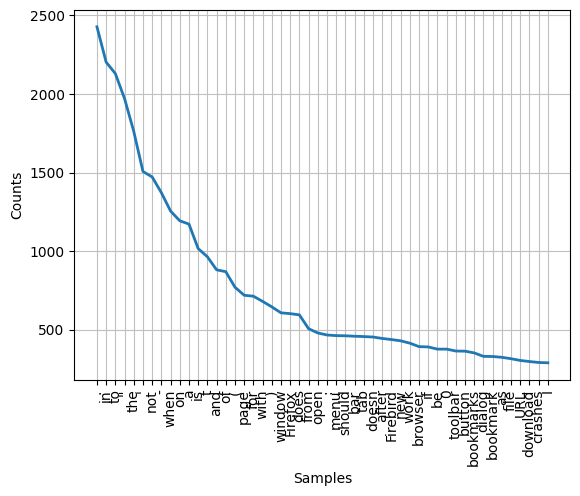

<Axes: xlabel='Samples', ylabel='Counts'>

In [80]:
#consider words with length greathan 3
large_words=dict([(k,v) for k,v in fre.items() if len(k)>3])
fre2 = nltk,FreqDist(large_words)
fre.plot(50,cumulative=False)

#buliding Word Cloud

In [81]:
pip install wordcloud

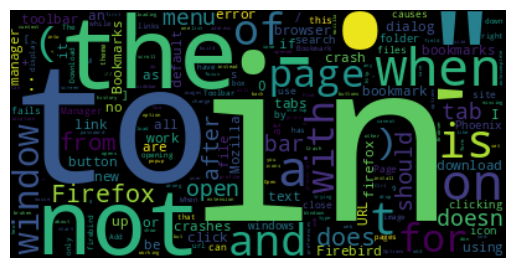

<function matplotlib.pyplot.show(close=None, block=None)>

In [82]:
from wordcloud import WordCloud
we = WordCloud()
we.generate_from_frequencies(fre)
import matplotlib.pyplot as plt
plt.imshow(we,interpolation='bilinear')
plt.axis('off')
plt.axis('off')
(-0.5,399.5,199.5,0.5)
plt.show()
plt.show

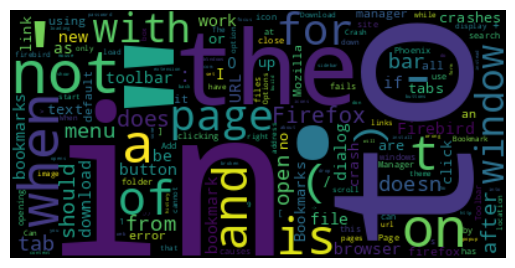

In [84]:
from wordcloud import WordCloud


# Create a WordCloud object and generate the word cloud
wordcloud = WordCloud()
wordcloud.generate_from_frequencies(fre)
# Display the word cloud using matplotlib
import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.axis("off")
(-0.5, 399.5, 199.5, -0.5)
plt.show()
plt.show()